# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [ ]:
import cv2
import os
import requests
import matplotlib.pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = '100zloty.jpg'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

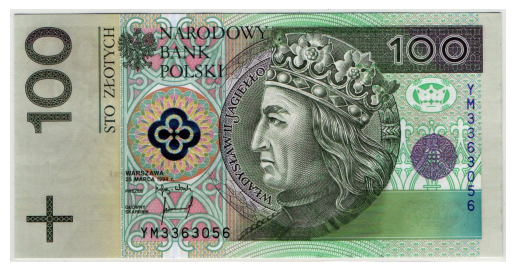

In [ ]:
I = cv2.imread('100zloty.jpg')
plt.axis('off')
plt.imshow(I)

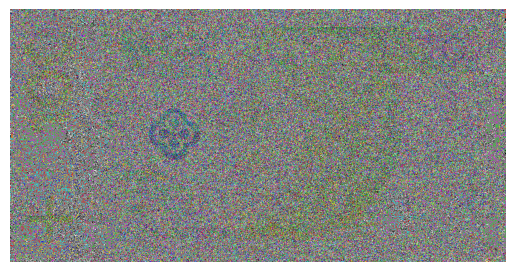

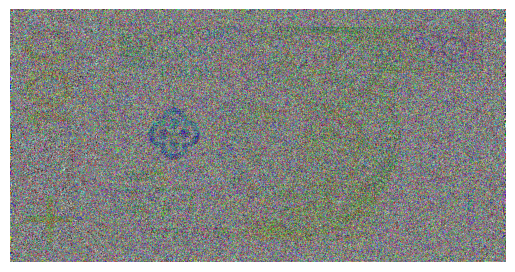

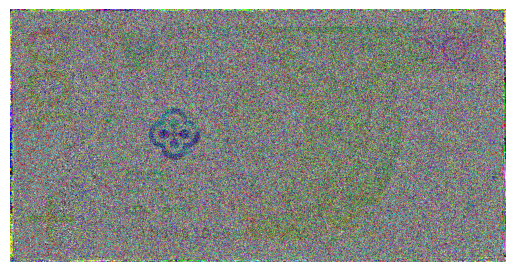

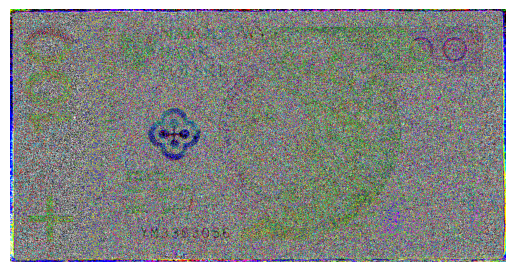

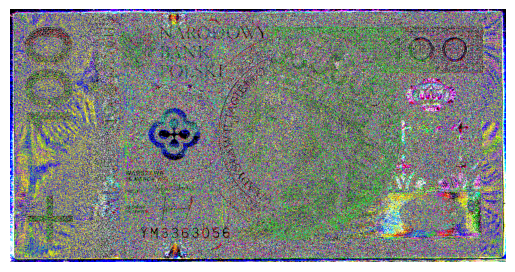

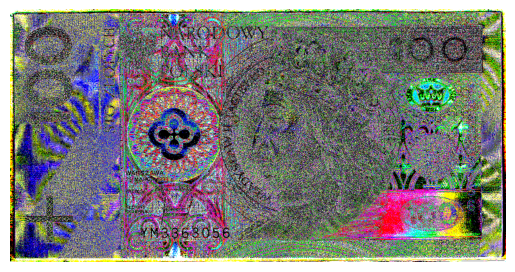

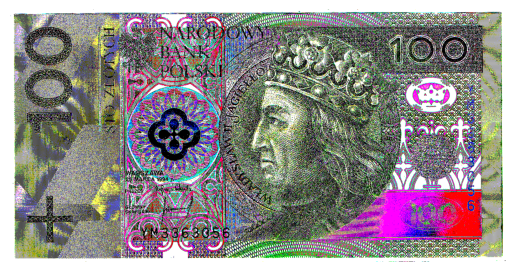

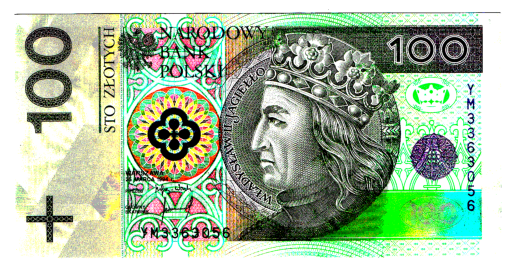

In [ ]:
transformed_images = []
for i in range(8):
  temp = I & (1 << i)
  temp = temp.astype('bool').astype('uint8') * 255
  transformed_images.append(temp)
  plt.axis('off')
  plt.imshow(temp)
  plt.show()

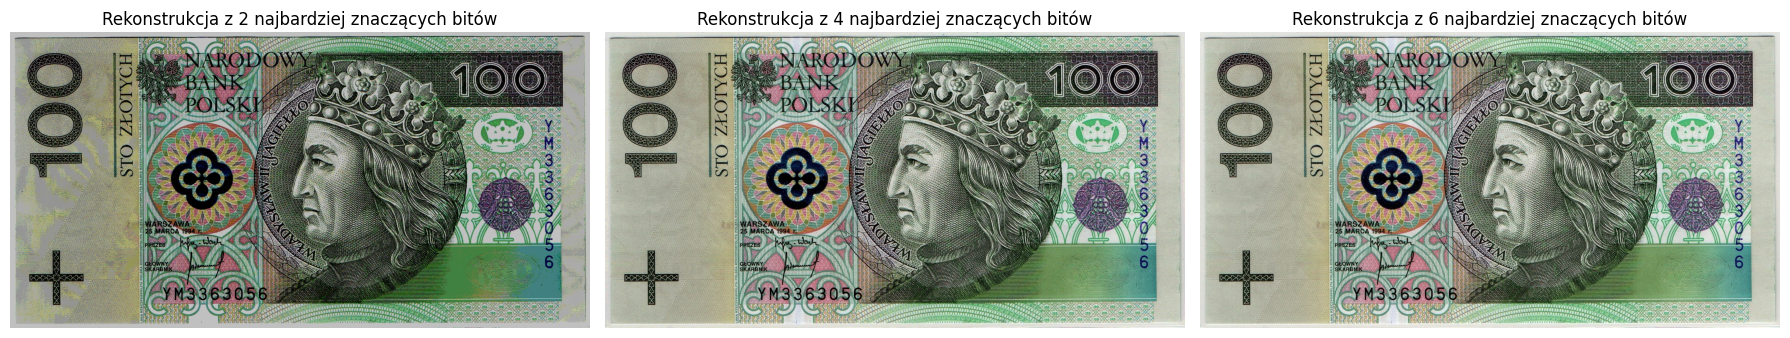

In [ ]:
def reconstruct_image(bit_planes, selected_bits):
    reconstructed_image = np.zeros_like(bit_planes[0])
    for i in selected_bits:
        reconstructed_image += (bit_planes[i] // 255) * (2**i)
    return reconstructed_image

reconstructed_image_2_bits = reconstruct_image(transformed_images, [6, 7])

reconstructed_image_4_bits = reconstruct_image(transformed_images, [4, 5, 6, 7])

reconstructed_image_6_bits = reconstruct_image(transformed_images, [2, 3, 4, 5, 6, 7])

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(reconstructed_image_2_bits, cmap='gray')
axes[0].set_title('Rekonstrukcja z 2 najbardziej znaczących bitów')
axes[0].axis('off')

axes[1].imshow(reconstructed_image_4_bits, cmap='gray')
axes[1].set_title('Rekonstrukcja z 4 najbardziej znaczących bitów')
axes[1].axis('off')

axes[2].imshow(reconstructed_image_6_bits, cmap='gray')
axes[2].set_title('Rekonstrukcja z 6 najbardziej znaczących bitów')
axes[2].axis('off')

plt.tight_layout()
plt.show()

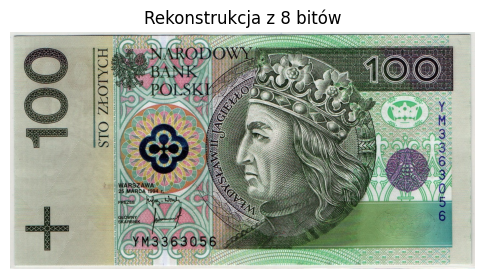

In [ ]:
reconstructed_image_8_bits = reconstruct_image(transformed_images, [0, 1, 2, 3, 4, 5, 6, 7])

plt.figure(figsize=(6, 6))
plt.imshow(reconstructed_image_8_bits, cmap='gray')
plt.title('Rekonstrukcja z 8 bitów')
plt.axis('off')
plt.show()
